#### **Análise dos preços de maçãs na Rússia com NumPy**  

Este notebook realiza uma análise exploratória dos preços médios de maçãs em diferentes cidades da Rússia, utilizando a biblioteca **NumPy** para manipulação de dados numéricos e **Matplotlib** para visualização gráfica. A análise abrange o período de **2013** a **2020** e busca compreender a variação dos preços ao longo dos anos, identificando padrões e tendências.  

##### **Objetivos**  

- Carregar e organizar os preços médios anuais das maçãs em cinco cidades russas;
- Tratar dados ausentes para garantir a consistência da análise;
- Criar visualizações para identificar tendências e comparações entre as cidades;
- Aplicar **regressão linear** para modelar a evolução dos preços em **Moscow** e prever possíveis tendências futuras.  

##### **Conjunto de dados**  

Os dados utilizados contêm informações sobre o preço médio das maçãs (por kg) em cinco cidades da Rússia, registrados anualmente entre **2013** e **2020**. Os preços estão expressos na moeda local (**rublos russos**) e refletem médias coletadas a partir de registros oficiais.  

##### **Bibliotecas utilizadas**  

**NumPy** – Manipulação de arrays numéricos e cálculos estatísticos.  
**Matplotlib** – Geração de gráficos para análise visual dos dados.  
**Python** – Lógica e execução da análise.  

##### **Principais resultados**  

A média de preços variou significativamente entre as cidades analisadas. A aplicação de **regressão linear** indicou uma tendência de crescimento nos preços em Moscow, sugerindo um aumento gradual nos anos seguintes.

In [8]:
# importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# índices das colunas utilizadas
np.arange(1, 88)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87])

In [10]:
# carregando os dados
dados = np.loadtxt('apples_ts.csv', delimiter = ',', usecols = np.arange(1, 88))

In [11]:
# visualizando os dados (12 primeiras colunas)
dados[:, :12]

array([[ 1.2013,  2.2013,  3.2013,  4.2013,  5.2013,  6.2013,  7.2013,
         8.2013,  9.2013, 10.2013, 11.2013, 12.2013],
       [79.72  , 81.08  , 79.68  , 79.8   , 80.63  , 80.8   , 80.28  ,
        78.99  , 76.77  , 76.09  , 76.36  , 77.16  ],
       [42.67  , 44.37  , 44.73  , 46.75  ,     nan, 51.59  , 57.8   ,
        62.14  , 56.76  , 50.85  , 46.43  , 46.73  ],
       [62.55  , 62.73  , 63.43  , 63.83  , 66.06  , 69.22  , 72.07  ,
        69.31  , 65.18  , 62.13  , 64.17  , 65.5   ],
       [48.26  , 51.01  , 50.91  , 53.94  , 61.27  , 65.44  , 56.51  ,
        53.    , 43.87  , 42.12  , 43.98  , 44.66  ],
       [71.25  , 71.35  , 70.9   , 71.92  , 72.91  , 74.39  , 73.1   ,
        70.24  , 69.12  , 68.98  , 68.58  , 69.5   ]])

In [12]:
# verificando a dimensão dos dados
dados.ndim

2

In [13]:
# verificando a quantidade dos dados
dados.size

522

In [14]:
# verificando a quantidade de linhas e colunas
dados.shape

(6, 87)

In [15]:
print(f'Quantidade de linhas: {dados.shape[0]}')
print(f'Quantidade de colunas: {dados.shape[1]}')

Quantidade de linhas: 6
Quantidade de colunas: 87


In [16]:
# transposição dos dados (12 primeiras linhas)
dados.T[:12, :]

array([[ 1.2013, 79.72  , 42.67  , 62.55  , 48.26  , 71.25  ],
       [ 2.2013, 81.08  , 44.37  , 62.73  , 51.01  , 71.35  ],
       [ 3.2013, 79.68  , 44.73  , 63.43  , 50.91  , 70.9   ],
       [ 4.2013, 79.8   , 46.75  , 63.83  , 53.94  , 71.92  ],
       [ 5.2013, 80.63  ,     nan, 66.06  , 61.27  , 72.91  ],
       [ 6.2013, 80.8   , 51.59  , 69.22  , 65.44  , 74.39  ],
       [ 7.2013, 80.28  , 57.8   , 72.07  , 56.51  , 73.1   ],
       [ 8.2013, 78.99  , 62.14  , 69.31  , 53.    , 70.24  ],
       [ 9.2013, 76.77  , 56.76  , 65.18  , 43.87  , 69.12  ],
       [10.2013, 76.09  , 50.85  , 62.13  , 42.12  , 68.98  ],
       [11.2013, 76.36  , 46.43  , 64.17  , 43.98  , 68.58  ],
       [12.2013, 77.16  , 46.73  , 65.5   , 44.66  , 69.5   ]])

In [17]:
# salvando o array transposto
dados_transposto = dados.T

In [18]:
# salvando a coluna de datas
datas = dados_transposto[:, 0]

In [19]:
# salvando as colunas de preços
precos = dados_transposto[:, 1:6]

In [20]:
# criando um sequência para as datas
datas = np.arange(1, 88)

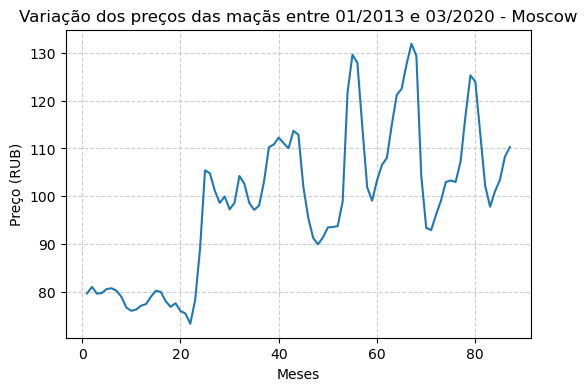

In [21]:
# visualizando os dados para Moscow
plt.figure(figsize = (6, 4))
plt.plot(datas, precos[:, 0])
plt.title('Variação dos preços das maçãs entre 01/2013 e 03/2020 - Moscow', fontsize = 12)
plt.xlabel('Meses', fontsize = 10)
plt.ylabel('Preço (RUB)', fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

In [22]:
# criando variáveis para cada coluna
Moscow = precos[:, 0]
Kaliningrad = precos[:, 1]
Petesburg = precos[:, 2]
Krasnodar = precos[:, 3]
Ekaterinburg = precos[:, 4]

In [23]:
# verificando o tamanho do array
Moscow.shape

(87,)

In [24]:
# dividindo os dados de preços de Moscow em períodos anuais (assumindo dados mensais)
Moscow_ano1 = Moscow[0: 12]
Moscow_ano2 = Moscow[12: 24]
Moscow_ano3 = Moscow[24: 36]
Moscow_ano4 = Moscow[36: 48]

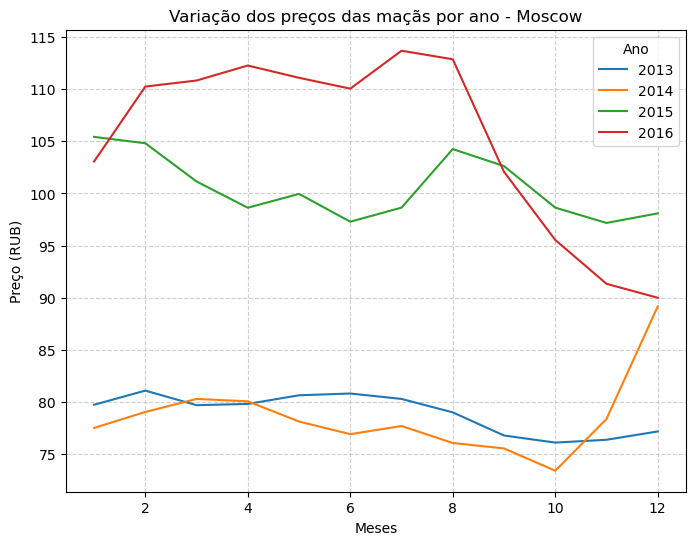

In [25]:
# visualizando os dados por ano para Moscow
plt.figure(figsize = (8, 6))
plt.plot(np.arange(1, 13), Moscow_ano1, label = '2013')
plt.plot(np.arange(1, 13), Moscow_ano2, label = '2014')
plt.plot(np.arange(1, 13), Moscow_ano3, label = '2015')
plt.plot(np.arange(1, 13), Moscow_ano4, label = '2016')
plt.title('Variação dos preços das maçãs por ano - Moscow', fontsize = 12)
plt.xlabel('Meses', fontsize = 10)
plt.ylabel('Preço (RUB)', fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.legend(title = 'Ano')
plt.show()

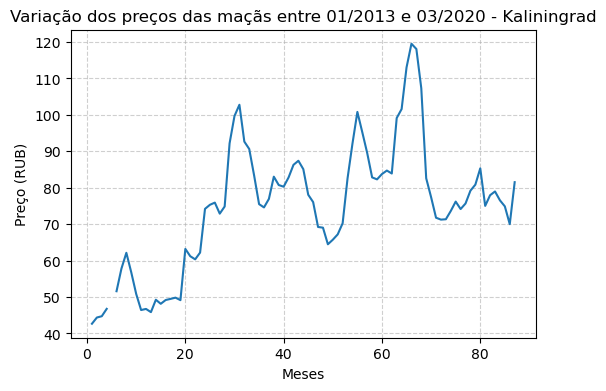

In [26]:
# visualizando os dados para Kaliningrad
plt.figure(figsize = (6, 4))
plt.plot(datas, Kaliningrad)
plt.title('Variação dos preços das maçãs entre 01/2013 e 03/2020 - Kaliningrad', fontsize = 12)
plt.xlabel('Meses', fontsize = 10)
plt.ylabel('Preço (RUB)', fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

In [27]:
# verificando um array
Kaliningrad

array([ 42.67,  44.37,  44.73,  46.75,    nan,  51.59,  57.8 ,  62.14,
        56.76,  50.85,  46.43,  46.73,  45.85,  49.25,  48.14,  49.18,
        49.49,  49.83,  49.14,  63.21,  61.2 ,  60.34,  62.2 ,  74.2 ,
        75.32,  75.92,  72.89,  74.85,  92.19,  99.7 , 102.78,  92.67,
        90.63,  83.31,  75.5 ,  74.6 ,  76.94,  83.04,  80.74,  80.29,
        82.82,  86.29,  87.41,  85.1 ,  78.08,  76.06,  69.23,  69.04,
        64.48,  65.73,  67.2 ,  70.25,  82.59,  92.12, 100.82,  95.23,
        89.51,  82.84,  82.3 ,  83.76,  84.72,  83.91,  99.14, 101.6 ,
       113.03, 119.54, 118.09, 107.32,  82.6 ,  77.4 ,  71.77,  71.25,
        71.35,  73.62,  76.2 ,  74.15,  75.67,  79.2 ,  80.85,  85.33,
        75.02,  77.95,  78.98,  76.55,  74.89,  70.  ,  81.53])

In [28]:
# verificando a quantidade de NaN
sum(np.isnan(Kaliningrad))

1

In [29]:
# preenchendo valores nulos com a média
Kaliningrad[4] = np.mean([Kaliningrad[3], Kaliningrad[5]])

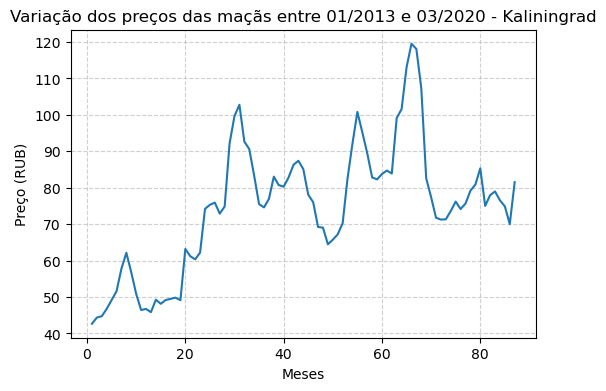

In [30]:
# visualizando os dados para Kaliningrad completo
plt.figure(figsize = (6, 4))
plt.plot(datas, Kaliningrad)
plt.title('Variação dos preços das maçãs entre 01/2013 e 03/2020 - Kaliningrad', fontsize = 12)
plt.xlabel('Meses', fontsize = 10)
plt.ylabel('Preço (RUB)', fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

In [31]:
# criando variáveis para análise dos preços médios das maçãs
media_moscow = np.mean(Moscow)
media_kaliningrad = np.mean(Kaliningrad)
media_petesburg = np.mean(Petesburg)
media_krasnodar = np.mean(Krasnodar)
media_ekaterinburg = np.mean(Ekaterinburg)

cidades = ['Moscow', 'Kaliningrad', 'Petesburg', 'Krasnodar', 'Ekaterinburg']
precos_medios = [media_moscow, media_kaliningrad, media_petesburg, media_krasnodar, media_ekaterinburg]
media_geral = np.mean(precos_medios)

In [32]:
# exibindo os preços médios das maçãs em diferentes cidades
print('-' * 32)
print(f'{"Cidade":<15}{"Preço médio (RUB)":>15}')
print('-' * 32)
print(f'{"Moscow":<15}{media_moscow.round(2):>15}')
print(f'{"Kaliningrad":<15}{media_kaliningrad.round(2):>15}')
print(f'{"Petesburg":<15}{media_petesburg.round(2):>15}')
print(f'{"Krasnodar":<15}{media_krasnodar.round(2):>15}')
print(f'{"Ekaterinburg":<15}{media_ekaterinburg.round(2):>15}')
print('-' * 32)

--------------------------------
Cidade         Preço médio (RUB)
--------------------------------
Moscow                    98.8
Kaliningrad              74.55
Petesburg                95.15
Krasnodar                72.01
Ekaterinburg            100.25
--------------------------------


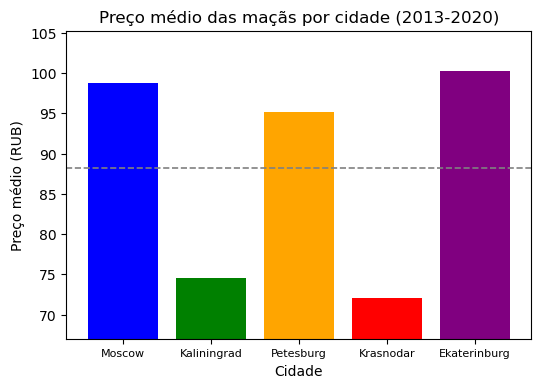

In [83]:
# visualizando o preço médio das maçãs em diferentes cidades
plt.figure(figsize = (6, 4))
plt.bar(cidades, precos_medios, color = ['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Preço médio das maçãs por cidade (2013-2020)', fontsize = 12)
plt.xlabel('Cidade', fontsize = 10)
plt.xticks(fontsize = 8)
plt.axhline(media_geral, color = 'gray', linestyle = '--', linewidth = 1.2)
plt.ylabel('Preço médio (RUB)', fontsize = 10)
plt.ylim(min(precos_medios) - 5, max(precos_medios) + 5)
plt.show()

##### **Modelo de regressão linear**

y = a.x + b

Coeficiente angular (a)

$$ \hat{a} = \frac{n*Soma( X_i*Y_i ) - Soma( X_i )*Soma(Y_i)}{n Soma(X_i^2) - (Soma(X_i))^2}$$

Coeficiente linear (b)

$$ \hat{b} = Media(Y_i) - \hat{a} * Media(X_i) $$

n = número de elementos

Y = preço das maças

X = meses (1 a 87)

In [39]:
# definindo as variáveis 
Y = Moscow
X = datas
n = np.size(Moscow)

In [40]:
# elevando ao quadrado todos os elementos do array
(X ** 2)

array([   1,    4,    9,   16,   25,   36,   49,   64,   81,  100,  121,
        144,  169,  196,  225,  256,  289,  324,  361,  400,  441,  484,
        529,  576,  625,  676,  729,  784,  841,  900,  961, 1024, 1089,
       1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936,
       2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025,
       3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356,
       4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929,
       6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569])

**a** representa a taxa de variação do preço em relação ao tempo

In [42]:
# aplicando a fórmula do coeficiente angular (inclinação da reta)
a = (n * np.sum(X * Y) - np.sum(X) * np.sum(Y)) / (n * np.sum(X ** 2) - np.sum(X) ** 2)
print(f'Coeficiente angular (a) = {a}')

Coeficiente angular (a) = 0.43520212145512926


**b** representa o preço estimado quando X (tempo) é zero

In [44]:
# aplicando a fórmula do coeficiente linear (interceptação da reta no eixo Y)
b = np.mean(Y) - a * np.mean(X)
print(f'Coeficiente linear (b) = {b}')

Coeficiente linear (b) = 79.64892274792834


In [45]:
# calculando os valores preditos
y = a * X + b

In [46]:
# calculando o erro residual
np.linalg.norm(Moscow - y)

101.79695399927512

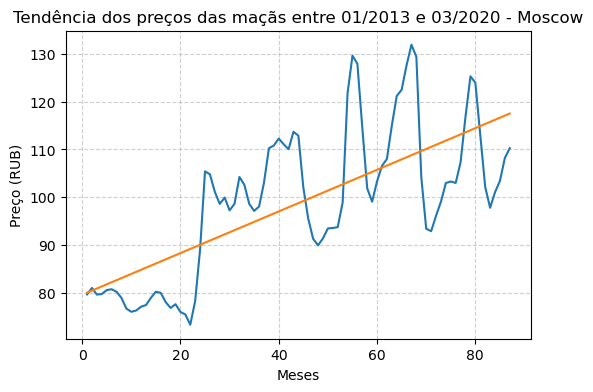

In [47]:
# visualizando a reta de regressão
plt.figure(figsize = (6, 4))
plt.plot(datas, Moscow)
plt.plot(datas, y)
plt.title('Tendência dos preços das maçãs entre 01/2013 e 03/2020 - Moscow', fontsize = 12)
plt.xlabel('Meses', fontsize = 10)
plt.ylabel('Preço (RUB)', fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

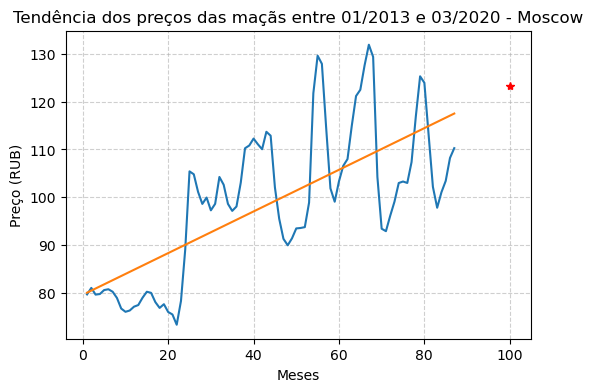

In [48]:
# visualizando valores estimados
mes = 100

plt.figure(figsize = (6, 4))
plt.plot(datas, Moscow)
plt.plot(datas, y)
plt.plot(mes, mes*a+b, '*r')
plt.title('Tendência dos preços das maçãs entre 01/2013 e 03/2020 - Moscow', fontsize = 12)
plt.xlabel('Meses', fontsize = 10)
plt.ylabel('Preço (RUB)', fontsize = 10)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()